## 一、Data Pre-processing

### 1、Reading Data

In [3]:
import pandas as pd
data = pd.read_csv(r"数据集.csv")
print("original data：{}；\nNumber of raw data attribute fields:{}".format(len(data),len(data.columns)))

original data：12684；
Number of raw data attribute fields:26


### 2、Remove Missing Value

In [4]:
##View the missing fields
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

According to the data missing value, choose to remove the car field; The missing rows of Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 are deleted. In addition, the value of toCoupon_GEQ5min field is all 1, which is meaningless for modeling, so it is also deleted.

In [5]:
cols = data.columns.to_list()
cols.remove("car")# Remove the car field
cols.remove("toCoupon_GEQ5min")# Remove the toCoupon_GEQ5min field
df = data[cols]
df = df.dropna()
df = df.reset_index(drop = True)
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,1,0,1
12075,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,0,1,1
12076,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,0,0,1,0,0
12077,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,1,0


### 3、Converts Non-numeric Attributes

In [6]:
destination = ["No Urgent Place","Home","Work"]
passanger = ["Alone","Friend(s)","Kid(s)","Partner"]
weather = ["Sunny","Rainy","Snowy"]
temperature = [30,50,80]
time = ["7AM","10AM","2PM","6PM","10PM"]
coupon = ['Restaurant(<20)','Restaurant(20-50)','Coffee House','Carry out & Take away','Bar']
expiration = ['2h','1d']
gender = ["Female","Male"]
age = ['below21','21','26','31','36','41','46','50plus']
maritalStatus = ['Single','Unmarried partner','Married partner','Divorced','Widowed']
has_children = [0,1]
education = ['Some High School','High School Graduate','Some college - no degree','Associates degree',
            'Bachelors degree','Graduate degree (Masters or Doctorate)']
occupation = ['Unemployed','Architecture & Engineering','Student','Education&Training&Library','Healthcare Support',
              'Healthcare Practitioners & Technical','Sales & Related','Management','Arts Design Entertainment Sports & Media',
              'Computer & Mathematical','Life Physical Social Science','Personal Care & Service','Community & Social Services',
              'Office & Administrative Support','Construction & Extraction','Legal','Retired','Installation Maintenance & Repair',
              'Transportation & Material Moving','Business & Financial','Protective Service','Food Preparation & Serving Related',
              'Production Occupations','Building & Grounds Cleaning & Maintenance','Farming Fishing & Forestry']
income = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999',
         '$75000 - $87499','$87500 - $99999','$100000 or More']
Bar = ['never','less1','1~3','4~8','gt8']
CoffeeHouse = ['never','less1','1~3','4~8','gt8']
CarryAway = ['never','less1','1~3','4~8','gt8']
RestaurantLessThan20 = ['never','less1','1~3','4~8','gt8']
Restaurant20To50 = ['never','less1','1~3','4~8','gt8']
#toCoupon_GEQ5min = [1]
toCoupon_GEQ15min = [0,1]
toCoupon_GEQ25min = [0,1]
direction_same = [0,1]
direction_opp = [0,1]
Y = [0,1]
Li = [destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,
      occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,
      toCoupon_GEQ25min,direction_same,direction_opp,Y]


Based on the above list of fields, replace the original data non-numeric field content with the index value of the corresponding content of the field list.

In [7]:
for index in df.index:
    for c in range(24):
        if c not in [3,10,19,20,21,22,23]:
            
            df.iloc[index,c] = Li[c].index(df.iloc[index,c])
        else:
            pass
df.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0,0,0,55,2,0,1,1,1,0,...,0,1,3,3,1,0,0,0,1,1
1,0,1,0,80,1,2,0,1,1,0,...,0,1,3,3,1,0,0,0,1,0
2,0,1,0,80,1,4,1,1,1,0,...,0,1,3,3,1,0,0,0,1,1
3,0,1,0,80,1,3,0,1,1,0,...,0,1,3,3,1,1,0,0,1,0
4,0,1,0,80,2,2,1,1,1,0,...,0,1,3,3,1,0,0,0,1,0


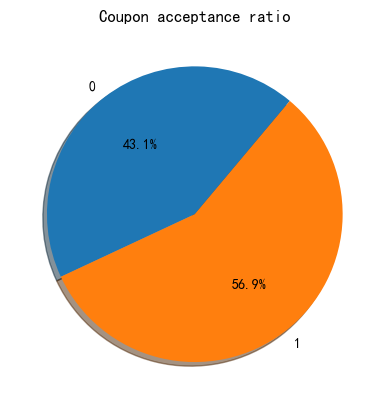

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
x1 = len(df[df["Y"]==0])
x2 = len(df[df["Y"]==1])
plt.pie([x1,x2],labels=["0","1"],autopct='%1.1f%%',shadow=True,startangle=50)
plt.title("Coupon acceptance ratio")
plt.show()

### 4、Save the Solved Data

In [9]:
df.to_csv(r"处理后数据.csv",encoding="utf-8-sig")

## 二、Field Filtering

### 1、Data Normalization

In [10]:
import numpy as np
df = pd.read_csv(r"处理后数据.csv",index_col=0)
for i in df.columns:
    df[i] = df[[i]].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))#归一化
df.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0.0,0.000000,0.0,0.5,0.50,0.00,1.0,1.0,0.142857,0.0,...,0.0,0.25,0.75,0.75,0.25,0.0,0.0,0.0,1.0,1.0
1,0.0,0.333333,0.0,1.0,0.25,0.50,0.0,1.0,0.142857,0.0,...,0.0,0.25,0.75,0.75,0.25,0.0,0.0,0.0,1.0,0.0
2,0.0,0.333333,0.0,1.0,0.25,1.00,1.0,1.0,0.142857,0.0,...,0.0,0.25,0.75,0.75,0.25,0.0,0.0,0.0,1.0,1.0
3,0.0,0.333333,0.0,1.0,0.25,0.75,0.0,1.0,0.142857,0.0,...,0.0,0.25,0.75,0.75,0.25,1.0,0.0,0.0,1.0,0.0
4,0.0,0.333333,0.0,1.0,0.50,0.50,1.0,1.0,0.142857,0.0,...,0.0,0.25,0.75,0.75,0.25,0.0,0.0,0.0,1.0,0.0


### 2、Correlation Analysis

In [11]:
df.corr()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
destination,1.000000,-0.544732,0.120081,-0.134725,-0.485241,0.057345,0.066634,-0.000981,-0.020029,-0.037604,...,0.004578,0.002578,-0.001650,-0.012591,-0.014570,0.027081,0.414811,0.432727,-0.432727,-0.117910
passanger,-0.544732,1.000000,-0.096329,0.054724,0.199123,-0.018187,-0.072136,-0.023610,0.030215,0.168323,...,-0.033232,-0.019598,-0.004150,0.037549,0.014451,0.063373,-0.196917,-0.267905,0.267905,0.049525
weather,0.120081,-0.096329,1.000000,-0.643953,-0.017505,0.060145,0.087938,0.030041,0.000509,0.000541,...,0.002344,0.015928,-0.014878,-0.021849,0.031666,0.135711,0.227408,-0.057820,0.057820,-0.093807
temperature,-0.134725,0.054724,-0.643953,1.000000,-0.035202,-0.127679,-0.125889,-0.027557,-0.013803,-0.013248,...,0.002075,-0.016783,0.012090,0.031073,-0.027650,-0.155876,-0.215780,0.097539,-0.097539,0.056646
time,-0.485241,0.199123,-0.017505,-0.035202,1.000000,-0.059670,-0.030161,-0.004099,0.002055,0.026236,...,-0.014878,-0.001510,-0.011071,-0.014098,0.004583,-0.067073,-0.206564,-0.013434,0.013434,0.017346
coupon,0.057345,-0.018187,0.060145,-0.127679,-0.059670,1.000000,0.147818,-0.008070,-0.002798,0.014272,...,-0.011306,-0.000771,-0.000829,-0.005479,-0.000544,0.131775,0.112877,0.073228,-0.073228,-0.097371
expiration,0.066634,-0.072136,0.087938,-0.125889,-0.030161,0.147818,1.000000,-0.002247,-0.020323,-0.016169,...,-0.009886,-0.003630,0.001379,-0.013255,-0.004020,-0.043305,0.032396,-0.034709,0.034709,0.133131
gender,-0.000981,-0.023610,0.030041,-0.027557,-0.004099,-0.008070,-0.002247,1.000000,-0.091687,-0.154863,...,0.164582,-0.045886,0.007091,-0.017518,0.035225,-0.005336,0.002575,-0.005313,0.005313,0.045261
age,-0.020029,0.030215,0.000509,-0.013803,0.002055,-0.002798,-0.020323,-0.091687,1.000000,0.385810,...,-0.162189,-0.052585,-0.062051,0.002981,0.000555,0.041209,-0.001444,-0.031232,0.031232,-0.057399
maritalStatus,-0.037604,0.168323,0.000541,-0.013248,0.026236,0.014272,-0.016169,-0.154863,0.385810,1.000000,...,-0.217380,-0.029659,-0.004250,0.076360,0.035761,0.040680,-0.018552,-0.014009,0.014009,-0.064993


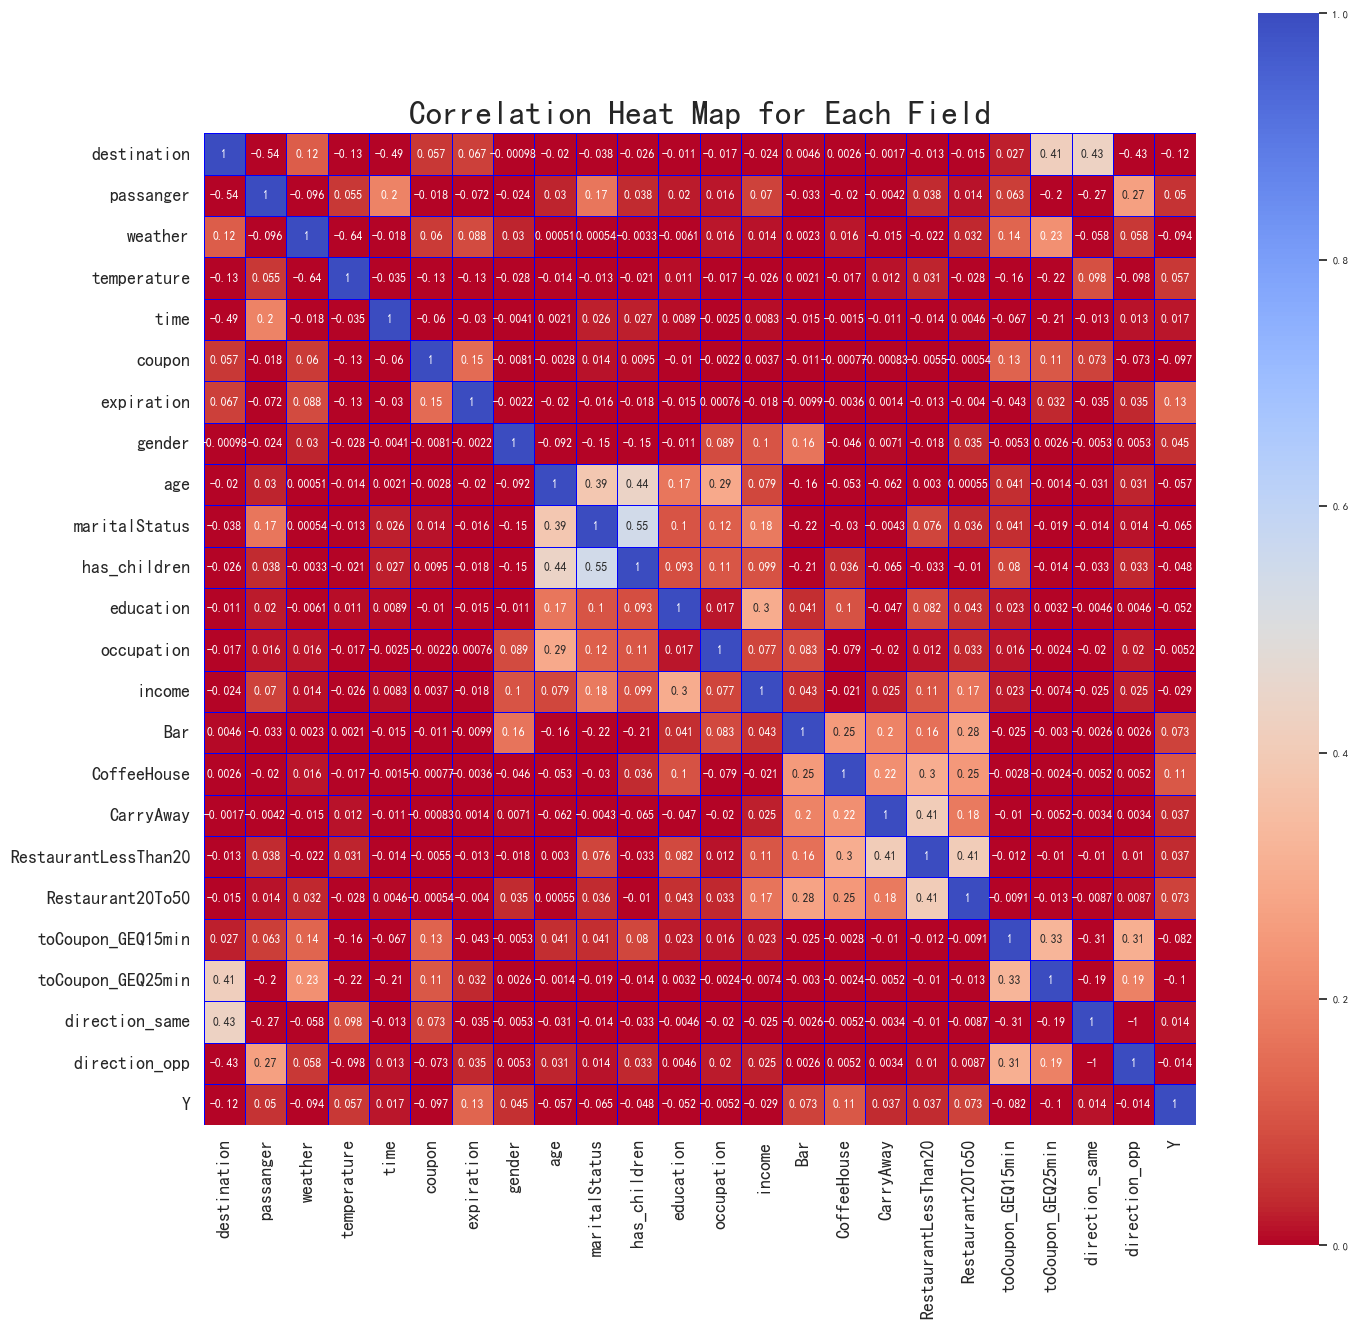

In [12]:
import seaborn as sns
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(font_scale=0.7,rc=rc)  
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),
            annot=True,  
            center=0.5,  
            linewidth=0.5,  
            linecolor='blue', 
            vmin=0, vmax=1, 
            xticklabels=True, yticklabels=True,  
            square=True,  
            cbar=True,  
            cmap='coolwarm_r',  
            )
plt.title("Correlation Heat Map for Each Field",fontsize = 24)
plt.tick_params(labelsize=13)
plt.show()

In [13]:
df.corr()["Y"]

destination            -0.117910
passanger               0.049525
weather                -0.093807
temperature             0.056646
time                    0.017346
coupon                 -0.097371
expiration              0.133131
gender                  0.045261
age                    -0.057399
maritalStatus          -0.064993
has_children           -0.048333
education              -0.051840
occupation             -0.005200
income                 -0.028862
Bar                     0.072649
CoffeeHouse             0.112868
CarryAway               0.036913
RestaurantLessThan20    0.037051
Restaurant20To50        0.073151
toCoupon_GEQ15min      -0.081711
toCoupon_GEQ25min      -0.100542
direction_same          0.014361
direction_opp          -0.014361
Y                       1.000000
Name: Y, dtype: float64

### 3、Lasso Regression

In [14]:
from sklearn.linear_model import Lasso
x = df[df.columns[:-1]]
y = df[df.columns[-1]]
lr=Lasso(alpha=0.01)
lr.fit(x,y)
print("Based on the lasso regression, the characteristics of the model regression coefficients that are not 0-equal at alpha = 0.01 are selected")
x = []
y = []
for i in lr.coef_.tolist():
    if i!=0:
        x.append(i)
        y.append(df.columns[lr.coef_.tolist().index(i)])
        print(df.columns[lr.coef_.tolist().index(i)],"：",i)

Based on the lasso regression, the characteristics of the model regression coefficients that are not 0-equal at alpha = 0.01 are selected
destination ： -0.08348748194273528
weather ： -0.042877916893072646
coupon ： -0.06452261967988007
expiration ： 0.10487603357787509
gender ： 0.00675909802859155
has_children ： -0.0057080593367497
CoffeeHouse ： 0.0785593804307396
toCoupon_GEQ15min ： -0.024226950556431252


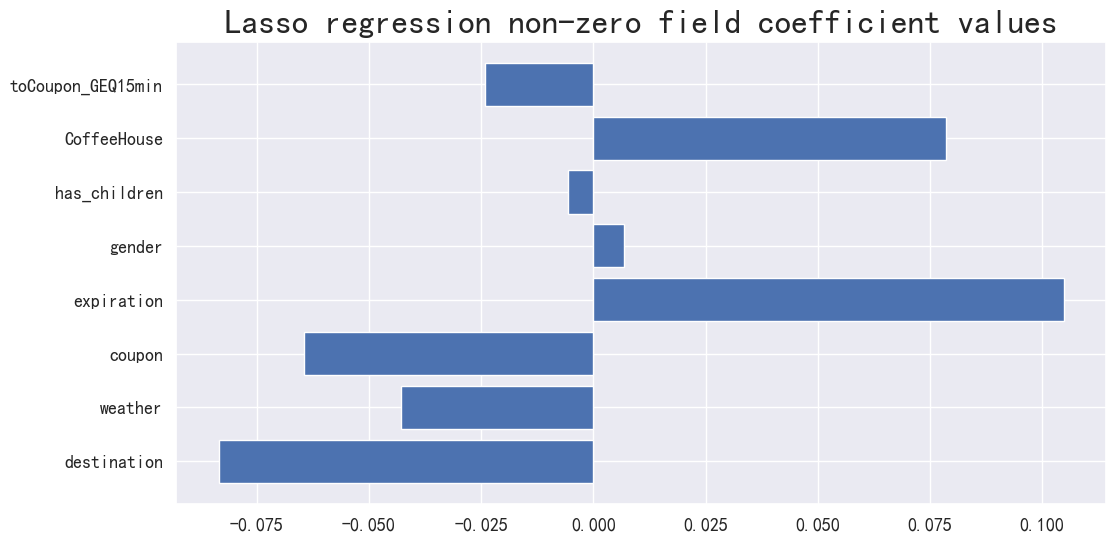

In [15]:
plt.figure(figsize=(12,6))
plt.barh(y,x)
plt.title("Lasso regression non-zero field coefficient values",fontsize = 24)
plt.tick_params(labelsize=13)
plt.show()

## 三、Hybrid SVM-ANN Prediction Models

### 1、Model Interpretation

In this paper, the fields "destination", "coupon", "expiration", "Bar", "CoffeeHouse", "toCoupon_GEQ25min" are selected as inputs and the Y field is selected as outputs. Firstly, the SVM and ANN models are trained using the sklearn module, and then the GradientBoostingClassifier is trained to produce the final outputs based on the prediction results of the SVM and ANN models. The GradientBoostingClassifier is then trained based on the results to produce the final output. The key step is to generate predictions from the base model on the test set and then use these predictions as input features to train the meta-model.

### 2、SVM-ANN Hybrid Model

In [16]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#divide dataset
X = df[['destination','weather','time','coupon','expiration','CoffeeHouse','Bar','toCoupon_GEQ15min','toCoupon_GEQ25min']]#自变量
Y = df[["Y"]]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

#Build SVM and ANN models
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
svm = SVC(C=1000,kernel="rbf")
ann = MLPClassifier(hidden_layer_sizes=500,activation="tanh",solver="lbfgs",batch_size=64)

#train models
svm.fit(X_train,Y_train)
ann.fit(X_train,Y_train)
#predict
svm_pre = svm.predict(X_test)
ann_pre = ann.predict(X_test)

#mixed model
blender = np.vstack((svm_pre,ann_pre)).T
blender_target = Y_test

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=20)#iterate 10
gb.fit(blender,blender_target)
final_pre = gb.predict(blender)
print(final_pre)

import pandas as pd
df = pd.DataFrame(final_pre, columns=['Prediction'])
print(df)

[1. 1. 1. ... 1. 1. 1.]
      Prediction
0            1.0
1            1.0
2            1.0
3            1.0
4            1.0
...          ...
3619         1.0
3620         1.0
3621         1.0
3622         1.0
3623         1.0

[3624 rows x 1 columns]


In [17]:
gb = GradientBoostingClassifier(n_estimators=20)
gb.fit(blender,blender_target)
final_pre = gb.predict(blender)

### 3、Model Accuracy

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,final_pre))

              precision    recall  f1-score   support

         0.0       0.69      0.61      0.65      1539
         1.0       0.74      0.79      0.76      2085

    accuracy                           0.72      3624
   macro avg       0.71      0.70      0.71      3624
weighted avg       0.71      0.72      0.71      3624



In [19]:
from sklearn import metrics
metrics.accuracy_score(Y_test,final_pre)

0.7163355408388521

### 4、k-fold Cross-validation

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(gb,X_test,final_pre,cv=10)
cross_val_scores.mean()

0.885758641157938

According to the 10-fold cross-validation results, the model model performance is relatively stable

### 5、Regularized Evaluation

In [21]:
from sklearn.model_selection import GridSearchCV
params = {"alpha":[0.1,1,10]}#L2
grid = GridSearchCV(ann,params,cv=10)
grid.fit(X_train,Y_train)
grid_pre = grid.predict(X_test)
blender1 = np.vstack((svm_pre,grid_pre)).T
blender_target1 = Y_test

gb1 = GradientBoostingClassifier()
gb1.fit(blender1,blender_target1)
final_pre1 = gb.predict(blender1)

Optimizing model accuracy with different L2 penalty (regularization term) parameters.

In [ ]:
blender1 = np.vstack((svm_pre,grid_pre)).T
blender_target1 = Y_test

gb1 = GradientBoostingClassifier()
gb1.fit(blender1,blender_target1)
final_pre1 = gb.predict(blender1)

In [ ]:
#Model Accuracy
print(classification_report(Y_test,final_pre1))

              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64      1514
         1.0       0.74      0.80      0.77      2110

    accuracy                           0.72      3624
   macro avg       0.71      0.70      0.70      3624
weighted avg       0.71      0.72      0.71      3624



In [ ]:
cross_val_scores = cross_val_score(gb1,X_test,final_pre1,cv=10)
cross_val_scores.mean()

0.8937674078809188

Based on the above results, it can be seen that after optimizing the model by different L2 penalty (regularization term) parameters, it does not change much on the model accuracy and improves the stability to some extent.

### 6、Varying Hyperparameters

Let's start with the learning rate and the number of iterations (n_estimators). In general, a small step size is chosen to start the grid search for the best number of iterations. Here, we set the initial step size to 0.1. For the number of iterations, the grid search is performed as follows:

In [ ]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                  min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', 
                                  subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(blender,blender_target)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 20}, 0.7214277508853173)

It can be seen that the best number of iterations is 20.

In [ ]:
gb = GradientBoostingClassifier(n_estimators=20)
gb.fit(blender,blender_target)
final_pre = gb.predict(blender)

In [ ]:
print(classification_report(Y_test,final_pre))

              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64      1514
         1.0       0.74      0.80      0.77      2110

    accuracy                           0.72      3624
   macro avg       0.71      0.70      0.70      3624
weighted avg       0.71      0.72      0.71      3624



In [ ]:
cross_val_scores = cross_val_score(gb,X_test,final_pre,cv=10)
cross_val_scores.mean()

0.8716915513751274

Based on the above results, it is seen that changing the number of model iterations to 20 has improved the stability to some extent.

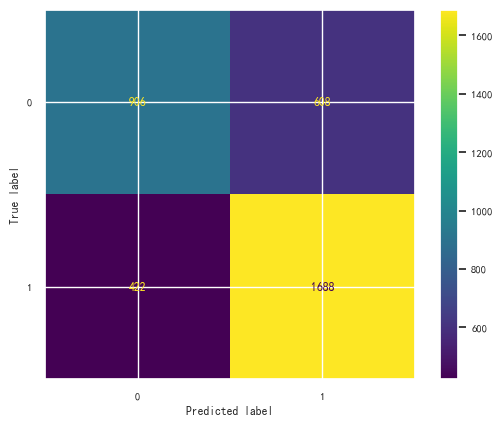

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, final_pre))
plt.title("Confusion Matrix",fontsize = 24)
disp.plot()

auc 0.6992073976221929


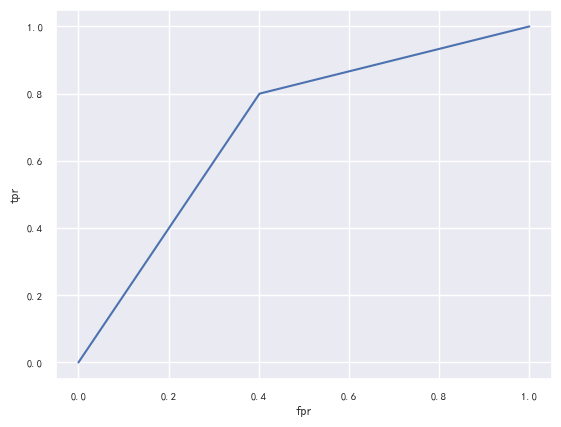

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
fpr,tpr,threshold=roc_curve(Y_test, final_pre)
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title("AUC",fontsize = 24)
print('auc',auc(fpr,tpr))